# CS 2302 - Quiz 6 - B-Trees

## **Before you start**

Make a copy of this Colab by clicking on File > Save a Copy in Drive


In [48]:
student_name = "Salvador Robles Herrera"
student_id = "80683116"

### [20 points] Problem 1

Complete the implementation of the method *largest_at_depth* that receives an integer *d* and returns the largest key in the tree that has depth *d*.



### [20 points] Problem 2

Complete the implementation of the method *num_nodes_at_depth* that receives an integer *d* and returns the number of nodes at depth *d*.



### [20 points] Problem 3

Complete the implementation of the method *key_depth* that receives a key *k* and returns the depth at which *k* is found in the tree, or -1 if *k* is not in the tree. To receive credit, you must take advantage of the fact that a B-Tree is a search tree. If you make unnecesary recursive calls, you will not earn any points. 




### [20 points] Problem 4

Complete the implementation of the method *num_full_nodes*. This method returns the number of nodes in the tree that are full (length of keys list is equal to the maximum number of keys they can hold).



### [20 points] Problem 5

Complete the implementation of the method *num_keys_larger_than*. This method receives a key *k* as input and returns the number of keys in the tree that are larger than than *k*. To receive credit, you must take advantage of the fact that a B-Tree is a search tree. If you make unnecesary recursive calls, you will not earn any points. 



**For all coding questions, feel free to write helper methods, if necessary**

In [49]:
# Code to implement a B-tree
# Programmed by Olac Fuentes
# Modified by Diego Aguirre on October 9, 2019


import matplotlib.pyplot as plt


class BTreeNode:
    # Constructor
    def __init__(self, keys=[], children=[], is_leaf=True, max_num_keys=5):
        self.keys = keys
        self.children = children
        self.is_leaf = is_leaf
        if max_num_keys < 3:  # max_num_keys must be odd and greater or equal to 3
            max_num_keys = 3
        if max_num_keys % 2 == 0:  # max_num_keys must be odd and greater or equal to 3
            max_num_keys += 1
        self.max_num_keys = max_num_keys

    def is_full(self):
        return len(self.keys) >= self.max_num_keys


class BTree:
    # Constructor
    def __init__(self, max_num_keys=5):
        self.max_num_keys = max_num_keys
        self.root = BTreeNode(max_num_keys=max_num_keys)

    # ------------- START PROBLEM 1 -------------
    def largest_at_depth(self, d):
      if self is None or d < 0:
        raise Exception()
      return self.largest_helper(self.root,d)

    def largest_helper(self, node, d):
      if node is None:
        raise Exeption()
      if d==0:
        return node.keys[len(node.keys)-1]

      if (len(node.children) == 0):
        raise Exception()

      return self.largest_helper(node.children[len(node.children)-1], d-1)
      

    # --------------- END PROBLEM 1 --------------

    # ------------- START PROBLEM 2 -------------
    def num_nodes_at_depth(self, d):
      if self is None or d < 0 or self.height()<d:
        return 0
      return self.num_nodes_helper(self.root,d)

    def num_nodes_helper(self, node, d):
      if d==0:
        return len(node.keys)

      num_nodes = 0
      for child in node.children:
        num_nodes += self.num_nodes_helper(child, d-1)

      return num_nodes

    # --------------- END PROBLEM 2 --------------

    # ------------- START PROBLEM 3 -------------
    def key_depth(self, k):
      if self is None:
        return -1
      return self.key_helper(self.root, k)

    def key_helper(self, node, k):
      if k in node.keys:
        return True
      if node.is_leaf:
        return False

      child_idx = self.find_child(k, node)
      return self.key_helper(node.children[child_idx],k)
      
    # --------------- END PROBLEM 3 --------------

    # ------------- START PROBLEM 4 -------------
    def num_full_nodes(self):
      if self is None:
        return 0
      return self.num_full_helper(self.root)

    def num_full_helper(self, node):
      full_nodes = 0
      if node.is_full():
        full_nodes += 1

      for child in node.children:
        full_nodes += self.num_full_helper(child)
      
      return full_nodes

    # --------------- END PROBLEM 4 --------------
  
    # ------------- START PROBLEM 5 -------------
    def num_keys_larger_than(self, k):
      if self is None:
        return 0
      return self.num_keys_helper(self.root, k)

    def num_keys_helper(self, node, k):
      if node.is_leaf:

        less_than = 0        
        for i in range(len(node.keys)):
          if node.keys[i] <= k:
            less_than += 1

        return len(node.keys) - less_than

      sum = 0
      less_than = 0
      for i in range(len(node.keys)):     
        if node.keys[i] <= k:
          less_than += 1

      child = less_than
      sum += len(node.keys) - less_than

      while len(node.children) > child:
        sum += self.num_keys_helper(node.children[child],k)
        child +=1 
        
      return sum
    # --------------- END PROBLEM 5 --------------
  
    def find_child(self, k, node):
        # Determines value of c, such that k must be in subtree node.children[c], if k is in the BTree
        for i in range(len(node.keys)):
            if k < node.keys[i]:
                return i
        return len(node.keys)

    def insert_internal(self, i, node):

        # node cannot be Full
        if node.is_leaf:
            self.insert_leaf(i, node)
        else:
            k = self.find_child(i, node)
            if node.children[k].is_full():
                m, l, r = self.split(node.children[k])
                node.keys.insert(k, m)
                node.children[k] = l
                node.children.insert(k + 1, r)
                k = self.find_child(i, node)
            self.insert_internal(i, node.children[k])

    def split(self, node):

        mid = node.max_num_keys // 2
        if node.is_leaf:
            left_child = BTreeNode(node.keys[:mid], max_num_keys=node.max_num_keys)
            right_child = BTreeNode(node.keys[mid + 1:], max_num_keys=node.max_num_keys)
        else:
            left_child = BTreeNode(node.keys[:mid], node.children[:mid + 1], node.is_leaf, max_num_keys=node.max_num_keys)
            right_child = BTreeNode(node.keys[mid + 1:], node.children[mid + 1:], node.is_leaf, max_num_keys=node.max_num_keys)
        return node.keys[mid], left_child, right_child

    def insert_leaf(self, i, node):
        node.keys.append(i)
        node.keys.sort()

    def leaves(self):
        return self._leaves(self.root)

    def _leaves(self, node):
        # Returns the leaves in a b-tree
        if node.is_leaf:
            return [node.keys]
        s = []
        for c in node.children:
            s = s + self._leaves(c)
        return s

    def insert(self, i):
        self._insert(i, self.root)

    def _insert(self, i, node):

        if not node.is_full():
            self.insert_internal(i, node)
        else:
            m, l, r = self.split(node)
            node.keys = [m]
            node.children = [l, r]
            node.is_leaf = False
            k = self.find_child(i, node)
            self.insert_internal(i, node.children[k])

    def height(self):
        return self._height(self.root)

    def _height(self, node):
        if node.is_leaf:
            return 0
        return 1 + self._height(node.children[0])

    def print(self):
        self._print(self.root)

    def _print(self, node):
        # Prints keys in tree in ascending order
        if node.is_leaf:
            for t in node.keys:
                print(t, end=' ')
        else:
            for i in range(len(node.keys)):
                self._print(node.children[i])
                print(node.keys[i], end=' ')
            self._print(node.children[len(node.keys)])

    def print_d(self, space):
        self._print_d(space, self.root)

    def _print_d(self, space, node=None):

        # Prints keys and structure of B-tree
        if node.is_leaf:
            for i in range(len(node.keys) - 1, -1, -1):
                print(space, node.keys[i])
        else:
            self._print_d(space + '   ', node.children[len(node.keys)])
            for i in range(len(node.keys) - 1, -1, -1):
                print(space, node.keys[i])
                self._print_d(space + '   ', node.children[i])

    def search(self, k):
        return self._search(k, self.root)

    def _search(self, k, node):
        # Returns node where k is, or None if k is not in the tree
        if k in node.keys:
            return node
        if node.is_leaf:
            return None
        return self._search(k, node.children[self.find_child(k, node)])

    def _set_x(self, dx, node=None):
        if node is None:
            node = self.root
        # Finds x-coordinate to display each node in the tree
        if node.is_leaf:
            return
        else:
            for c in node.children:
                self._set_x(dx, c)
            d = (dx[node.children[0].keys[0]] + dx[node.children[-1].keys[0]] + 10 * len(node.children[-1].keys)) / 2
            dx[node.keys[0]] = d - 10 * len(node.keys) / 2

    def _draw_btree(self, dx, y, y_inc, fs, ax, node):

        # Function to display b-tree to the screen
        # It works fine for trees with up to about 70 keys
        xs = dx[node.keys[0]]
        if node.is_leaf:
            for itm in node.keys:
                ax.plot([xs, xs + 10, xs + 10, xs, xs], [y, y, y - 10, y - 10, y], linewidth=1, color='k')
                ax.text(xs + 5, y - 5, str(itm), ha="center", va="center", fontsize=fs)
                xs += 10
        else:
            for i in range(len(node.keys)):
                xc = dx[node.children[i].keys[0]] + 5 * len(node.children[i].keys)
                ax.plot([xs, xs + 10, xs + 10, xs, xs], [y, y, y - 10, y - 10, y], linewidth=1, color='k')
                ax.text(xs + 5, y - 5, str(node.keys[i]), ha="center", va="center", fontsize=fs)
                ax.plot([xs, xc], [y - 10, y - y_inc], linewidth=1, color='k')
                self._draw_btree(dx, y - y_inc, y_inc, fs, ax, node.children[i])
                xs += 10
            xc = dx[node.children[-1].keys[0]] + 5 * len(node.children[-1].keys)
            ax.plot([xs, xc], [y - 10, y - y_inc], linewidth=1, color='k')
            self._draw_btree(dx, y - y_inc, y_inc, fs, ax, node.children[-1])

    def draw(self):
        # Find x-coordinates of leaves
        ll = self.leaves()
        dx = {}
        d = 0
        for l in ll:
            dx[l[0]] = d
            d += 10 * (len(l) + 1)
            # Find x-coordinates of internal nodes
        self._set_x(dx)
        # plt.close('all')
        fig, ax = plt.subplots()
        self._draw_btree(dx, 0, 30, 10, ax, self.root)
        ax.set_aspect(1.0)
        ax.axis('off')
        plt.show()

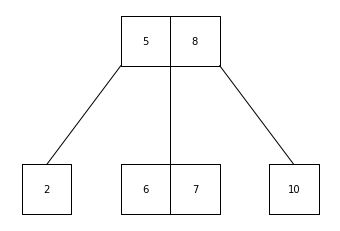

largest_at_depth, what I got:  8  Expected: 8
largest_at_depth, what I got:  10  Expected: 10
num_nodes_at_depth, what I got:  2  Expected: 2
num_nodes_at_depth, what I got:  4  Expected: 4
key_depth, what I got:  True  Expected: True
key_depth, what I got:  True  Expected: True
key_depth, what I got:  False  Expected: False
num_full_nodes, what I got:  0  Expected: 0
num_keys_larger_than, what I got:  5  Expected: 5


In [50]:
b = BTree(3)
#b2 = BTree(4)
#for i in range(10):
#  b2.insert(i)
b.insert(2)
b.insert(5)
b.insert(8)
b.insert(10)
b.insert(6)
b.insert(7)
b.draw()
#b2.draw()
print("largest_at_depth, what I got: ", b.largest_at_depth(0), " Expected: 8")
print("largest_at_depth, what I got: ", b.largest_at_depth(1), " Expected: 10")
print("num_nodes_at_depth, what I got: ", b.num_nodes_at_depth(0), " Expected: 2")
print("num_nodes_at_depth, what I got: ", b.num_nodes_at_depth(1), " Expected: 4")
print("key_depth, what I got: ", b.key_depth(2), " Expected: True")
print("key_depth, what I got: ", b.key_depth(7), " Expected: True")
print("key_depth, what I got: ", b.key_depth(9), " Expected: False")
print("num_full_nodes, what I got: ", b.num_full_nodes(), " Expected: 0")
print("num_keys_larger_than, what I got: ", b.num_keys_larger_than(2), " Expected: 5")


## How to Submit 

1. File > Download .ipynb
2. Go to Blackboard, find the submission page, and upload the .ipynb file you just downloaded.